<h1 align = "center">机器学习第一次实验报告</h1>

<h6 align = "center">姓名：邢清画&nbsp&nbsp&nbsp&nbsp         学号：2211999  &nbsp &nbsp&nbsp专业：物联网工程</h5>

### 实验题目

- 基于kNN 的手写数字识别

### 实验条件

- 给定semeion手写数字数据集，给定kNN分类算法

### 实验要求

1. **初级要求：**编程实现kNN算法；给出在不同k值（5，9，13）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. **中级要求：**与机器学习包或平台(如weka)中的kNN分类器结果进行对比，性能指标为精度ACC，其他指标如归一化互信息NMI、混淆熵CEN任选其一（或两者）
3. **高级要求：**采用旋转等手段对原始数据进行处理，进行至少两个方向（左上，左下）旋转，采用CNN或其他深度学习方法实现手写体识别

### 代码实现

#### 1. **初级要求**

在这部分通过手写kNN算法实现了手写数字识别，并采用留一法对模型性能进行评估，代码 如下：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.font_manager as fm

# 设置字体为SimHei（黑体），以支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 加载数据
file_path = 'semeion.data'
data = np.loadtxt(file_path)

# 提取特征和标签
X = data[:, :256]  # 前256列是特征
y = np.argmax(data[:, 256:], axis=1)  # 后面九个数字表示类别

# 手动实现的kNN算法
def manual_knn(X_train, X_test, y_train, k):
    # 计算欧几里得距离
    distances = np.sqrt(np.sum((X_train - X_test) ** 2, axis=1))
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_neighbors]
    return np.bincount(nearest_labels).argmax()

# 手动实现留一法并计算精度
def manual_leave_one_out_knn(k_values):
    accuracies = []
    all_y_true = []
    all_y_pred = []

    for k in k_values:
        y_true = []
        y_pred = []

        print(f"\nEvaluating k={k} using manual Leave-One-Out...")
        for i in range(len(X)):
            # 将第i个样本作为测试集，剩余的样本作为训练集
            X_train = np.delete(X, i, axis=0)  # 删除第i行数据
            y_train = np.delete(y, i, axis=0)
            X_test = X[i]  # 第i行作为测试数据
            y_test = y[i]

            # 使用手动实现的kNN进行分类
            pred = manual_knn(X_train, X_test, y_train, k)
            y_pred.append(pred)
            y_true.append(y_test)

        # 计算精度
        accuracy = accuracy_score(y_true, y_pred)
        print(f"Accuracy for k={k}: {accuracy:.4f}")
        accuracies.append((k, accuracy))

        if k == 9:  # 选定 k=9 时绘制混淆矩阵
            all_y_true = y_true
            all_y_pred = y_pred

    return accuracies, all_y_true, all_y_pred

# # 结果可视化函数
# def plot_accuracies(k_values, accuracies):
#     # 提取 k 值和对应的准确度
#     ks = [k for k, acc in accuracies]
#     accs = [acc for k, acc in accuracies]

#     # 绘制图表
#     plt.figure(figsize=(8, 6))
#     plt.plot(ks, accs, marker='o', linestyle='-', color='b')
#     plt.title('Accuracy vs k in kNN with Leave-One-Out Cross-Validation')
#     plt.xlabel('k')
#     plt.ylabel('Accuracy')
#     plt.xticks(k_values)
#     plt.grid(True)
#     plt.show()

# # 混淆矩阵可视化
# def plot_confusion_matrix(y_true, y_pred, k):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'混淆矩阵 (k={k})')
#     plt.xlabel('预测标签')
#     plt.ylabel('真实标签')
#     plt.show()

# 设置k值
k_values = [5, 9, 13]

# 运行手动实现的kNN并获取精度
accuracies, all_y_true, all_y_pred = manual_leave_one_out_knn(k_values)

# # 绘制准确度图
# plot_accuracies(k_values, accuracies)

# # 绘制混淆矩阵（选定 k=9）
# plot_confusion_matrix(all_y_true, all_y_pred, k=9)



Evaluating k=5 using manual Leave-One-Out...
Accuracy for k=5: 0.9052

Evaluating k=9 using manual Leave-One-Out...
Accuracy for k=9: 0.9096

Evaluating k=13 using manual Leave-One-Out...
Accuracy for k=13: 0.9058


##### **1.1 关键内容：**

1. **计算欧几里得距离**：

   通过欧几里得距离公式计算测试样本与训练集样本之间的距离，公式如下：

   <img src="../code/src/1.png" alt="Image" style="text-align: center;display: block; margin: 0 auto;"/>

   `X_train - X_test` 计算训练集中每个样本与测试样本的特征差值。`X_train` 是形状为 (n_samples, n_features) 的数组，`X_test` 是形状为 (n_features,) 的单个样本。广播机制会自动将 `X_test` 扩展为与 `X_train` 兼容的形状。`y_train[nearest_neighbors]` 提取 k 个最近邻样本的真实类别。`np.bincount(nearest_labels).argmax()` 计算每个类别的出现次数，返回票数最多的类别作为预测结果。

2. **kNN（k最近邻算法）**：

   - 对于每个测试样本，计算其与训练集中所有样本的距离，然后选择距离最近的 k 个邻居。

   - 从这 k 个邻居的标签中进行投票，选择出现最多的类别作为预测类别，使用 `np.bincount` 函数计算票数，最终使用 `argmax` 返回票数最多的标签。

3. **留一法（Leave-One-Out Cross-Validation, LOO-CV）**

   - **原理：**对于数据集中的每个样本，将该样本作为测试集，其他样本作为训练集。每次迭代时删除第 i 个样本（`np.delete(X, i, axis=0)`）作为测试集，剩余样本作为训练集。确保了模型能够在所有样本上进行独立的评估，避免模型对特定样本的依赖。

   - **精度评估：**对每个 k 值，逐个样本进行评估，预测结果存储在 `y_pred` 列表中，真实标签存储在 `y_true` 列表中。

   最终通过 `accuracy_score(y_true, y_pred)` 计算预测精度。

4. **计算精度**：

   精度是正确预测的样本数与总样本数的比值：

   <img src="../code/src/2.png" alt="Image" style="text-align: center;display: block; margin: 0 auto;"/>
   <!-- <img src="../code/src/2.png" alt="Image" style="width:400px; height:300px;"/> -->

   `accuracy_score` 函数通过比较这两个列表计算预测正确的比例，返回模型的精度值。

##### 1.2 实验结果：

代码运行结果显示了不同k值对应的Accuracy值，可以简单看出k=9最高。

<!-- ![image](../code/src/3.png) -->
 <img src="../code/src/3.png" alt="Image" style="width:800px; height:170px;display: block; margin: 0 auto;"/>

将k值对Accuracy的影响可视化得到两张对比图

<!-- ![image](../code/src/4.png) -->
<img src="../code/src/4.png" alt="Image" style="width:800px; height:600px;display: block; margin: 0 auto;"/>

从图1中可以看到，当k = 9时，模型达到了最高的准确率（约为0.910）。这表明，使用9个最近邻的投票进行分类时，模型的表现最好。

较小的k值（如k = 5）导致模型准确率较低，可能是因为模型受到了噪声的影响，导致过拟合。

较大的k值（如k = 13）导致模型准确率下降，可能是因为邻居过多，导致模型的决策边界变得模糊，分类能力下降。

在目前得到的最优k=9情况下：
<!-- ![image](../code/src/5.png) -->
<img src="../code/src/5.png" alt="Image" style="width:800px; height:650px;display: block; margin: 0 auto;"/>

得到上述（第二张图片）**混淆矩阵**，用于评估分类模型的性能，展示了模型的分类结果与实际类别的对比。每个元素 (i,j) 表示真实标签为 i 的样本被分类为 j 的数量。

**对角线上的数值**表示模型分类正确的样本数量；**非对角线上的数值**表示分类错误的样本数量；**颜色深浅**代表该位置的数值大小，颜色越深，数值越大。

在上图中，kNN 算法使用 k=9 进行分类，模型总体上表现不错，绝大多数样本落在了对角线上，说明模型的分类准确度较高。但是仍有一些样本被错误分类，特别是在第 7 类和第 9 类中，错误分类的数量较为明显（例如，16 个真实类别为 7 的样本被错误分类为类别 1）。

#### 2. **中级要求**

在该实验中，我将初级要求手动实现的kNN算法与机器学习包中的kNN分类器结果进行对比，性能指标为精度ACC，其他指标为归一化互信息NMI、混淆熵CEN。代码如下：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm
import math

# 加载数据
file_path = 'semeion.data'
data = np.loadtxt(file_path)

# 提取特征和标签
X = data[:, :256]  # 前256列是特征
y = np.argmax(data[:, 256:], axis=1)  # 后面九个数字表示类别

# 定义留一法交叉验证
loo = LeaveOneOut()


# 手动实现的kNN算法
def manual_knn(X_train, X_test, y_train, k):
    distances = np.sqrt(np.sum((X_train - X_test) ** 2, axis=1))
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_neighbors]
    # 返回出现最多的标签
    return np.bincount(nearest_labels).argmax()


# 计算概率混淆矩阵
def compute_probabilistic_confusion_matrix(conf_matrix):
    prob_conf_matrix = conf_matrix.astype(float)
    for i in range(conf_matrix.shape[0]):
        prob_conf_matrix[i] = conf_matrix[i] / np.sum(conf_matrix[i])
    return prob_conf_matrix


# 计算P_ij值
def compute_P_ij(p_ij, prob_matrix, m):
    return p_ij / np.sum(prob_matrix, axis=1)


# 计算详细的 CEN
def calculate_cen(conf_matrix):
    m = conf_matrix.shape[0]  # 类别数量
    prob_matrix = compute_probabilistic_confusion_matrix(conf_matrix)

    # 初始化每个类别的CEN值
    CENj = np.zeros(m)

    # 计算每个类别j的CEN_j
    for j in range(m):
        for k in range(m):
            if j != k:
                # 计算单个概率值
                P_jjk = prob_matrix[j, k] / np.sum(prob_matrix[j])
                P_kj = prob_matrix[k, j] / np.sum(prob_matrix[k])

                # 确保计算出的值是标量
                if np.isscalar(P_jjk) and np.isscalar(P_kj):
                    CENj[j] -= (P_jjk * np.log2((m - 1) * P_jjk + 1e-9) + P_kj * np.log2((m - 1) * P_kj + 1e-9))

    # 计算总体CEN
    total_Pj = np.sum(prob_matrix, axis=0) / (2 * np.sum(prob_matrix))
    overall_CEN = np.sum(total_Pj * CENj)

    return overall_CEN


# 对比手动实现kNN和sklearn的kNN
def compare_knn(k_values):
    results = []
    for k in k_values:
        y_true = []
        y_pred_manual = []
        y_pred_sklearn = []

        # sklearn的kNN分类器
        knn = KNeighborsClassifier(n_neighbors=k)

        print(f"Evaluating k={k}...")
        for train_index, test_index in tqdm(loo.split(X), total=len(X)):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # 手动实现kNN
            pred_manual = manual_knn(X_train, X_test[0], y_train, k)
            y_pred_manual.append(pred_manual)

            # sklearn实现kNN
            knn.fit(X_train, y_train)
            pred_sklearn = knn.predict(X_test)[0]
            y_pred_sklearn.append(pred_sklearn)

            y_true.append(y_test[0])

        # 计算性能指标
        acc_manual = accuracy_score(y_true, y_pred_manual)
        acc_sklearn = accuracy_score(y_true, y_pred_sklearn)
        nmi_manual = normalized_mutual_info_score(y_true, y_pred_manual)
        nmi_sklearn = normalized_mutual_info_score(y_true, y_pred_sklearn)

        # 计算混淆矩阵
        cm_manual = confusion_matrix(y_true, y_pred_manual)
        cm_sklearn = confusion_matrix(y_true, y_pred_sklearn)

        # 计算CEN
        cen_manual = calculate_cen(cm_manual)
        cen_sklearn = calculate_cen(cm_sklearn)

        results.append({
            "k": k,
            "ACC (Manual)": acc_manual,
            "ACC (sklearn)": acc_sklearn,
            "NMI (Manual)": nmi_manual,
            "NMI (sklearn)": nmi_sklearn,
            "CEN (Manual)": cen_manual,
            "CEN (sklearn)": cen_sklearn
        })
        # 在终端打印每个 k 值的结果
        print(f"Results for k={k}:")
        print(f"  手动实现 kNN - ACC: {acc_manual:.4f}, NMI: {nmi_manual:.4f}, CEN: {cen_manual:.4f}")
        print(f"  sklearn实现 kNN - ACC: {acc_sklearn:.4f}, NMI: {nmi_sklearn:.4f}, CEN: {cen_sklearn:.4f}")

    return results


# 设置k值
k_values = [5, 9, 13]

# 运行实验并比较结果
knn_comparison_results = compare_knn(k_values)

import matplotlib.pyplot as plt
import matplotlib

# # 设置中文字体
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# # 可视化对比结果
# def visualize_comparison_results(results):
#     ks = [r["k"] for r in results]

#     acc_manual = [r["ACC (Manual)"] for r in results]
#     acc_sklearn = [r["ACC (sklearn)"] for r in results]
#     nmi_manual = [r["NMI (Manual)"] for r in results]
#     nmi_sklearn = [r["NMI (sklearn)"] for r in results]
#     cen_manual = [r["CEN (Manual)"] for r in results]
#     cen_sklearn = [r["CEN (sklearn)"] for r in results]

#     # ACC对比
#     plt.figure(figsize=(10, 6))
#     plt.plot(ks, acc_manual, label='手动实现的kNN - ACC', marker='o')
#     plt.plot(ks, acc_sklearn, label='sklearn实现的kNN - ACC', marker='o')
#     plt.xlabel('k值', fontsize=12)
#     plt.ylabel('ACC (精度)', fontsize=12)
#     plt.title('手动实现与sklearn kNN的精度对比', fontsize=15)
#     plt.legend()
#     plt.show()

#     # NMI对比
#     plt.figure(figsize=(10, 6))
#     plt.plot(ks, nmi_manual, label='手动实现的kNN - NMI', marker='o')
#     plt.plot(ks, nmi_sklearn, label='sklearn实现的kNN - NMI', marker='o')
#     plt.xlabel('k值', fontsize=12)
#     plt.ylabel('NMI (归一化互信息)', fontsize=12)
#     plt.title('手动实现与sklearn kNN的NMI对比', fontsize=15)
#     plt.legend()
#     plt.show()

#     # CEN对比
#     plt.figure(figsize=(10, 6))
#     plt.plot(ks, cen_manual, label='手动实现的kNN - CEN', marker='o')
#     plt.plot(ks, cen_sklearn, label='sklearn实现的kNN - CEN', marker='o')
#     plt.xlabel('k值', fontsize=12)
#     plt.ylabel('CEN (混淆熵)', fontsize=12)
#     plt.title('手动实现与sklearn kNN的CEN对比', fontsize=15)
#     plt.legend()
#     plt.show()


# # 可视化实验结果
# visualize_comparison_results(knn_comparison_results)


d:\Miniconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Evaluating k=5...


100%|██████████| 1593/1593 [00:17<00:00, 91.43it/s] 


Results for k=5:
  手动实现 kNN - ACC: 0.9052, NMI: 0.8286, CEN: 0.1351
  sklearn实现 kNN - ACC: 0.9052, NMI: 0.8293, CEN: 0.1328
Evaluating k=9...


100%|██████████| 1593/1593 [00:17<00:00, 92.68it/s] 


Results for k=9:
  手动实现 kNN - ACC: 0.9096, NMI: 0.8317, CEN: 0.1448
  sklearn实现 kNN - ACC: 0.9115, NMI: 0.8336, CEN: 0.1468
Evaluating k=13...


100%|██████████| 1593/1593 [00:17<00:00, 92.67it/s]

Results for k=13:
  手动实现 kNN - ACC: 0.9058, NMI: 0.8238, CEN: 0.1545
  sklearn实现 kNN - ACC: 0.9033, NMI: 0.8224, CEN: 0.1480


##### 2.1 关键内容：

1. **归一化互信息（NMI）**： 用于衡量两个标签分配之间的相似度，越接近1表示越一致。公式为：
<img src="../code/src/6.png" alt="Image" style="display: block; margin: 0 auto;"/>

2. **混淆熵（CEN）**： 用于衡量分类模型的分类不确定性，数值越低表示模型越不容易混淆。公式为：

   <img src="../code/src/7.png" alt="Image" style="display: block; margin: 0 auto;" />

##### 2.2 实验结果：

<img src="../code/src/8.png" alt="Image" style="width:800px; height:350px;display: block; margin: 0 auto;"/>

<img src="../code/src/9.png" alt="Image" style="width:800px; height:500px;display: block; margin: 0 auto;"/>

**总体趋势**：无论是手动实现的kNN还是`sklearn`实现的kNN，随着k值的增大，模型的准确率呈现先升后降的趋势。

**最佳k值**：当k = 9时，两个模型的精度均达到最高，`sklearn`的精度略高于手动实现的模型。

较小的k值（如k = 5）精度较低，可能是由于过拟合。较大的k值（如k = 13）精度也下降，可能是因为模型的决策边界变得模糊。

<img src="../code/src/10.png" alt="Image" style="width:800px; height:500px;display: block; margin: 0 auto;"/>

**总体趋势**：同样的，NMI值也随着k的增大呈现出先升后降的趋势。

**最佳k值**：k = 9时，NMI值达到最高，`sklearn`的NMI略高于手动实现的kNN。

较小和较大的k值导致NMI下降，说明模型的分类结果与真实标签分布的相似度下降。

<img src="../code/src/11.png" alt="Image" style="width:800px; height:500px;display: block; margin: 0 auto;"/>

**总体趋势**：CEN值随着k的增大逐渐上升。与ACC和NMI不同，CEN的变化趋势更加稳定，随着k的增加，CEN值也逐渐增加。

**最佳k值**：CEN最小的点在k = 5处，表示此时模型的混淆程度最小，但准确率和NMI较低。

##### 2.3 产生差异的原因分析

1. **手动实现与`sklearn`实现的kNN算法的差异**

- **距离计算方法**：
  - 手动实现的kNN算法使用了**欧几里得距离**。`sklearn`中的kNN可能在距离计算过程中采用了更多的优化，例如处理浮点数精度问题、并行计算等。
  - `sklearn`中的kNN可以使用不同的距离度量方式（例如曼哈顿距离、闵可夫斯基距离等），如果默认使用了优化的欧几里得距离或其他高效算法，可能会导致略高的精度和NMI。
- **实现细节和数值精度**：
  - `sklearn`库是经过高度优化的工业级机器学习库，内部实现上可能有更多针对不同数据类型、输入格式的优化处理。手动实现的版本在处理大规模数据或边界条件时，可能会存在精度损失或者数值稳定性问题。

2. **k值对模型性能的影响**

- **k值较小时**（如k = 5），模型容易**过拟合**：
  - 当k值较小的时候，模型在局部的决策边界上更依赖于邻近的少数几个数据点。如果这些邻居点中包含噪声数据，模型可能会产生较大的偏差，导致分类结果不准确。手动实现和`sklearn`都表现出相对较低的精度和NMI。
  - 但是此时CEN值最低，说明模型的分类混淆度较低。这可能意味着尽管分类错误多，但模型对某些类别的混淆较少。
- **k值较大时**（如k = 13），模型可能会**欠拟合**：
  - 当k值过大时，模型可能会倾向于将数据点分类为最常见的类别，忽略局部的细节，导致决策边界变得模糊，分类准确率下降。这种情况下，`sklearn`和手动实现的精度和NMI都出现了下降。
  - CEN值随着k值的增加逐渐上升，表明随着k值增大，模型的混淆程度变得更大，因为决策边界逐渐失去局部敏感性。
- **最佳k值**（k = 9）：sklearn`的性能稍微好于手动实现的版本，可能是因为其更好的数值精度和距离计算的优化。手动实现的kNN在精度和NMI上稍逊色，可能是由于实现中的计算误差或优化不足所致。

3. **不同指标的表现原因**

- **精度（ACC）**：`sklearn`的kNN精度略高，可能是由于实现上有更好的数值稳定性和优化处理。
- **归一化互信息（NMI）**：`sklearn`的kNN同样在NMI上表现更好，这与精度相符，说明其分类结果与真实标签的相似度更高。`sklearn`的kNN更好地捕捉到了类别间的分布关系。
- **混淆熵（CEN）**：手动实现的kNN在CEN上表现更好（混淆度更低）。这是因为手动实现的kNN可能在某些局部的决策边界上表现得更加谨慎，导致分类的混淆程度较低。也可能是由于其在局部分类上的不稳定性，使分类结果较为集中在某些类别上，从而减少了类间混淆。

4. **数据特性与模型性能的关系**

- **数据维度与类别分布**：手写体数据集（如Semeion）是一个高维数据集（256维特征），并且类别分布可能存在不均衡。kNN算法在处理**高维数据**时的性能可能会有所下降，因为高维空间中的距离计算会导致“维度灾难”，即高维空间中的距离差异不明显，导致分类边界模糊。
- **噪声和异常值**：Semeion数据集中的**噪声和异常值**可能对小k值的模型产生较大影响。当k较小时，手动实现的kNN可能受噪声影响较大，而`sklearn`可能在处理这类问题时有更好的鲁棒性。

5. **数值计算与优化**

- `sklearn`中的kNN算法已经被高度优化，尤其是在大规模数据集和多维数据上的表现可能优于简单的手动实现。它可能使用了KD树或Ball树等**数据结构**来加速邻居搜索，而手动实现的版本则是直接使用**暴力搜索法**（逐点比较所有样本），这会导致在大型数据集上效率较低，间接影响模型表现。
- 此外，`sklearn`对数值精度和边界条件有更多**优化**，避免了计算中的数值溢出或舍入误差，这可能是它在精度和NMI上表现略优的原因。

#### 3. **高级要求**

采用旋转手段对原始数据进行处理，进行左上、右下旋转15°的操作，选择 **Conv2D**实现手写体识别。代码如下：

Epoch 1/55


d:\Miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1221 - loss: 2.3034 - val_accuracy: 0.0878 - val_loss: 2.3031
Epoch 2/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0878 - val_loss: 2.3026
Epoch 3/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1011 - loss: 2.3009 - val_accuracy: 0.0878 - val_loss: 2.2954
Epoch 4/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1226 - loss: 2.2814 - val_accuracy: 0.1818 - val_loss: 2.2051
Epoch 5/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3141 - loss: 2.1161 - val_accuracy: 0.6270 - val_loss: 1.7992
Epoch 6/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 1.6773 - val_accuracy: 0.6489 - val_loss: 1.3102
Epoch 7/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6476 - loss: 1.2307 - val_accuracy: 0.7461 - val_loss: 0.9789
Epoch 8/55
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7438 - loss: 0.9581 - val_accuracy: 0.8182 - val_loss: 0.7479
Epo

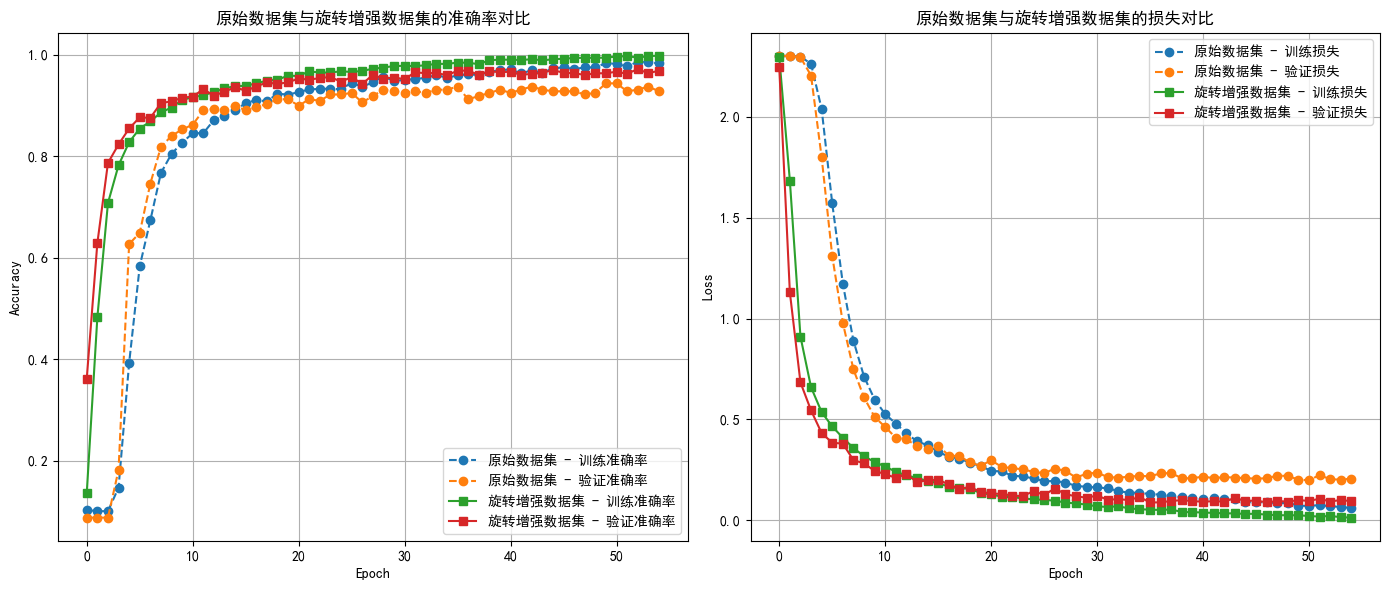

In [5]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :256]  # 图像数据
    y = data[:, 256:]  # 标签
    y = np.argmax(y, axis=1)  # 将one-hot编码的标签转换为整数标签
    X = X.reshape(-1, 16, 16, 1)  # 将数据重塑为16x16的单通道图像
    return X, y

# 图像旋转
def rotate_images(images, angle):
    rotated_images = []
    for img in images:
        M = cv2.getRotationMatrix2D((8, 8), angle, 1.0)  # 以(8,8)为中心旋转
        rotated_img = cv2.warpAffine(img.squeeze(), M, (16, 16))  # 旋转图像
        rotated_img = rotated_img.reshape(16, 16, 1)  # 重新调整形状
        rotated_images.append(rotated_img)
    return np.array(rotated_images)

# 构建CNN模型
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # 输出10类，分别对应0-9
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 加载原始数据（不进行旋转增强）
X_original, y_original = load_data('semeion.data')

# 划分训练集和测试集（原始数据集）
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# 调整数据格式以适应CNN输入（原始数据集）
X_train_original = X_train_original.astype('float32') / 255.0  # 归一化处理
X_test_original = X_test_original.astype('float32') / 255.0

# 创建并训练CNN模型（原始数据集）
cnn_model_original = create_cnn_model()
history_original = cnn_model_original.fit(X_train_original, y_train_original, epochs=55, batch_size=32,
                                          validation_data=(X_test_original, y_test_original))

# 模型评估（原始数据集）
loss_original, accuracy_original = cnn_model_original.evaluate(X_test_original, y_test_original)
print(f'CNN模型在原始数据集上的准确率: {accuracy_original:.4f}, loss: {loss_original:.4f}')

# 加载数据并进行旋转增强
X, y = load_data('semeion.data')

# 数据增强 - 旋转图像
X_rotated_15 = rotate_images(X, 15)  # 左上方向旋转15度
X_rotated_345 = rotate_images(X, -15)  # 右下方向旋转15度

# 合并原始数据和旋转后的数据
X_augmented = np.concatenate([X, X_rotated_15, X_rotated_345])
y_augmented = np.concatenate([y, y, y])

# 划分训练集和测试集（旋转增强数据集）
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# 调整数据格式以适应CNN输入（旋转增强数据集）
X_train = X_train.astype('float32') / 255.0  # 归一化处理
X_test = X_test.astype('float32') / 255.0

# 创建并训练CNN模型（旋转增强数据集）
cnn_model_augmented = create_cnn_model()
history_augmented = cnn_model_augmented.fit(X_train, y_train, epochs=55, batch_size=32,
                                            validation_data=(X_test, y_test))

# 模型评估（旋转增强数据集）
loss_augmented, accuracy_augmented = cnn_model_augmented.evaluate(X_test, y_test)
print(f'CNN模型在旋转增强数据集上的准确率: {accuracy_augmented:.4f}, loss: {loss_augmented:.4f}')
print(f'CNN模型在原始数据集上的准确率: {accuracy_original:.4f}, loss: {loss_original:.4f}')

# 绘制两个数据集的准确率和损失曲线在同一张图上
def plot_comparison_training_history(history_original, history_augmented):
    # 准确率对比图
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_original.history['accuracy'], label='原始数据集 - 训练准确率', linestyle='--', marker='o')
    plt.plot(history_original.history['val_accuracy'], label='原始数据集 - 验证准确率', linestyle='--', marker='o')
    plt.plot(history_augmented.history['accuracy'], label='旋转增强数据集 - 训练准确率', linestyle='-', marker='s')
    plt.plot(history_augmented.history['val_accuracy'], label='旋转增强数据集 - 验证准确率', linestyle='-', marker='s')
    plt.title('原始数据集与旋转增强数据集的准确率对比')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 损失对比图
    plt.subplot(1, 2, 2)
    plt.plot(history_original.history['loss'], label='原始数据集 - 训练损失', linestyle='--', marker='o')
    plt.plot(history_original.history['val_loss'], label='原始数据集 - 验证损失', linestyle='--', marker='o')
    plt.plot(history_augmented.history['loss'], label='旋转增强数据集 - 训练损失', linestyle='-', marker='s')
    plt.plot(history_augmented.history['val_loss'], label='旋转增强数据集 - 验证损失', linestyle='-', marker='s')
    plt.title('原始数据集与旋转增强数据集的损失对比')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
# 绘制两个数据集的训练历史对比
plot_comparison_training_history(history_original, history_augmented)
# # 混淆矩阵的可视化
# def plot_confusion_matrix(model, X_test, y_test, title):
#     y_pred = np.argmax(model.predict(X_test), axis=1)
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot(cmap=plt.cm.Blues)
#     plt.title(f'{title} - 混淆矩阵')
#     plt.show()

# # 绘制混淆矩阵
# plot_confusion_matrix(cnn_model_original, X_test_original, y_test_original, '原始数据集')
# plot_confusion_matrix(cnn_model_augmented, X_test, y_test, '旋转增强数据集')

# 可视化准确率和损失对比条形图
# def plot_comparison(accuracy_original, accuracy_augmented, loss_original, loss_augmented):
#     labels = ['原始数据集', '旋转增强数据集']
#     accuracy = [accuracy_original, accuracy_augmented]
#     loss = [loss_original, loss_augmented]

#     x = np.arange(len(labels))
#     width = 0.35

#     fig, ax1 = plt.subplots(figsize=(10, 5))

#     ax1.bar(x - width / 2, accuracy, width, label='准确率', color='blue')
#     ax1.set_xlabel('数据集类型')
#     ax1.set_ylabel('准确率')
#     ax1.set_title('不同数据集上的准确率和损失对比')
#     ax1.set_xticks(x)
#     ax1.set_xticklabels(labels)
#     ax1.legend(loc='upper left')

#     ax2 = ax1.twinx()
#     ax2.bar(x + width / 2, loss, width, label='损失', color='orange')
#     ax2.set_ylabel('损失')
#     ax2.legend(loc='upper right')

#     fig.tight_layout()
#     plt.show()

##### 3.1 关键方法

1. **数据增强 - 图像旋转：`rotate_images`**

   对图像进行旋转，扩展数据集。通过旋转图像进行数据增强，使模型更具鲁棒性。

   - **图像旋转**：使用OpenCV的`getRotationMatrix2D()`函数生成旋转矩阵，以图像的中心 `(8, 8)` 为中心旋转 `angle` 角度。

   - **仿射变换**：使用`cv2.warpAffine`进行仿射变换，将图像根据生成的旋转矩阵进行旋转。公式为：

   <img src="../code/src/12.png" alt="Image" style="display: block; margin: 0 auto;"/>

   - **数据增强**：通过旋转不同角度的图像（左旋15度和右旋15度），生成新的样本，扩展数据集。

     

2. **卷积神经网络（CNN）模型的构建：`create_cnn_model`**

   第一个卷积层有32个过滤器，卷积核大小为3×3，激活函数为ReLU，使用`padding='same'`保持输出大小不变。输入形状为16×16的单通道图像。

   第二个卷积层有64个过滤器，继续使用3×3卷积核和ReLU激活函数。

      <img src="../code/src/13.png" alt="Image" style="display: block; margin: 0 auto;" />

   **池化层（MaxPooling2D）**：

   - 每个卷积层后接一个池化层，使用2×2的窗口进行最大池化，减少特征图的维度。池化层的作用是缩减空间维度，减少计算量并抑制过拟合。

   **全连接层（Dense）**：

   - 卷积和池化层之后通过`Flatten()`展平特征图，接着通过一个128单元的全连接层（Dense），激活函数为ReLU。
   - 最后一层是输出层，使用softmax激活函数，输出10个类别对应的概率。

   **模型编译**：使用Adam优化器和稀疏分类交叉熵损失函数（`sparse_categorical_crossentropy`）进行模型编译。

   <img src="../code/src/14.png" alt="Image" style="display: block; margin: 0 auto;"/>

3. **数据增强与训练集划分**

   - **数据增强**：通过两次不同角度的旋转（15度和-15度），生成两个新的数据集。通过`np.concatenate()`将原始数据和增强数据拼接在一起，扩展训练集的规模。

   - **数据划分**：使用`train_test_split`将增强后的数据集划分为训练集和测试集，测试集比例为20%。

   - **数据归一化**：将像素值（0-255）缩放到 [0, 1] 范围，帮助模型更好地收敛。
##### 3.2 实验结果

<img src="../code/src/3.1.png" alt="Image" style="width:800px; height:180px;display: block; margin: 0 auto;"/>

<img src="../code/src/3.2.png" alt="Image" style="width:800px; height:200px;display: block; margin: 0 auto;"/>

<img src="../code/src/15.png" alt="Image" style="width:1000px; height:450px;display: block; margin: 0 auto;"/>

**训练准确率和验证准确率**：两个数据集在训练过程中准确率都快速提升，并逐渐收敛至较高水平。旋转增强数据集的验证准确率略高，表明增强后的数据集提高了模型在测试集上的表现。

**训练损失和验证损失**：训练损失和验证损失都在不断下降，且旋转增强数据集的验证损失收敛得更好。总体上旋转增强数据集的模型收敛效果更好。

<img src="../code/src/16.png" alt="Image" style="width:650px; height:550px;display: block; margin: 0 auto;"/>

<img src="../code/src/17.png" alt="Image" style="width:650px; height:550px;display: block; margin: 0 auto;"/>

相比原始数据集，旋转增强数据集上的混淆矩阵显示出更少的误分类。特别是类 `3` 和 `5` 的分类效果显著提升，其他类别的分类效果也更加稳定。

##### 原因分析：

1. **数据增强的有效性**：

   旋转增强数据集的模型表现优于原始数据集，说明在手写体识别任务中，适度的旋转数据增强可以有效提高模型的**泛化能力**，使其能够更好地应对不同书写风格的变化。

2. **模型的鲁棒性提升**：

   增加了数据集的多样性，模型能够学到更多的特征，不会过度**依赖特定角度或形状**的手写数字，从而在不同条件下表现更加鲁棒。

3. **模型的过拟合问题得到缓解**：

   数据增强使得模型在训练过程中能够见到更多样化的样本，避免了对固定特征的**过拟合**，从而在验证集和测试集上都取得了更好的效果。

同时我也用**kNN**对增强数据集进行了测试，对比在原始数据集上的结果：

<img src="../code/src/18.png" alt="Image" style="width:800px; height:400px;display: block; margin: 0 auto;"/>

旋转增强数据集上的 kNN 模型表现普遍优于原始数据集，特别是在较大的 k 值时，增强数据集上的模型具有更好的泛化能力。

在原始数据集中，k 值的增大并没有带来性能的提升，反而可能引入了更多噪声样本，导致模型的准确率下降。

### 总结和思考

在本次手写数字识别实验中，我通过实现和对比 kNN 模型在原始数据集和旋转增强数据集上的性能，进一步应用 CNN 模型对数据增强效果进行了验证。

起初，我以为数据增强可能会增加模型的复杂度，反而降低模型性能，但结果表明数据增强大大提高了模型的泛化能力。这让我意识到，适当的增强策略不仅不会引入过多噪声，反而能帮助模型更好地理解数据特征。

在实验过程中，手动实现 kNN 算法和与标准库对比的过程让我更深入地理解了 kNN 的工作机制及其局限性；而在 CNN 模型训练中，数据增强使模型在复杂任务中的表现更为突出。实验中的最大挑战是在平衡模型复杂度与数据多样性之间找到最佳方案，这促使我反思在实际应用中，模型与数据的匹配才是提升性能的关键所在。

总体而言，这次实验帮助我更全面地认识了数据增强的价值，并为如何在未来优化模型提供了新的思路。